## **Libraries and Functions Import**

In [ ]:
from source.utility import *
from copy import deepcopy

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

parallel = True

if parallel:
    from ray.util.multiprocessing import Pool
    pool = Pool(10)

#### Utility function to run experiment in parallel

In [2]:
def run_experiment(env_list, K, algorithm, arg, parallel):
    
    regret_list = []
    
    if not parallel:
        for env in env_list:
            regret = calculate_regret(env, K, algorithm, deepcopy(arg))
            regret_list.append(regret)
            
    else:
        arg_list = []
        for env in env_list:
            arg_list.append((env, K, algorithm, arg))

        results = pool.starmap(calculate_regret, arg_list)
        for output in results:
            regret_list.append(output)
        
    regret_list = np.array(regret_list)
    
    print("DONE - algorithm={}, arg={}".format(algorithm, arg))
    
    return regret_list

## **Sample Random MDPs**

In [3]:
# Number of simulations and total number of episodes
M = 50
K = 1000 

# MDP parameters
S = 25
A = 2
H = 10
W = 5
L = 0.25

# Generate environments
env_list = []
for i in range(M):
    env_list.append(generate_Lipschitz_env(S, A, H, W, L))

## **Run Experiment**

In [4]:
regret_greedy = []
for env in env_list:
    regret_greedy.append(np.mean(env.V_star[0]) - np.mean(env.V_greedy[0]))
regret_greedy = np.array(regret_greedy)

regret_UCB_H = run_experiment(env_list, K, "UCB_H", {}, parallel)
regret_UCBVI = run_experiment(env_list, K, "UCBVI", {}, parallel)

regret_UCB_f_0 = run_experiment(env_list, K, "UCB_f", {"epsilon": 0}, parallel)
regret_UCB_f_1 = run_experiment(env_list, K, "UCB_f", {"epsilon": 1}, parallel)
regret_UCB_f_2 = run_experiment(env_list, K, "UCB_f", {"epsilon": 2}, parallel)

DONE - algorithm=UCB_H, arg={}
DONE - algorithm=UCBVI, arg={}
DONE - algorithm=UCB_f, arg={'epsilon': 0}
DONE - algorithm=UCB_f, arg={'epsilon': 1}
DONE - algorithm=UCB_f, arg={'epsilon': 2}


## **Plot**

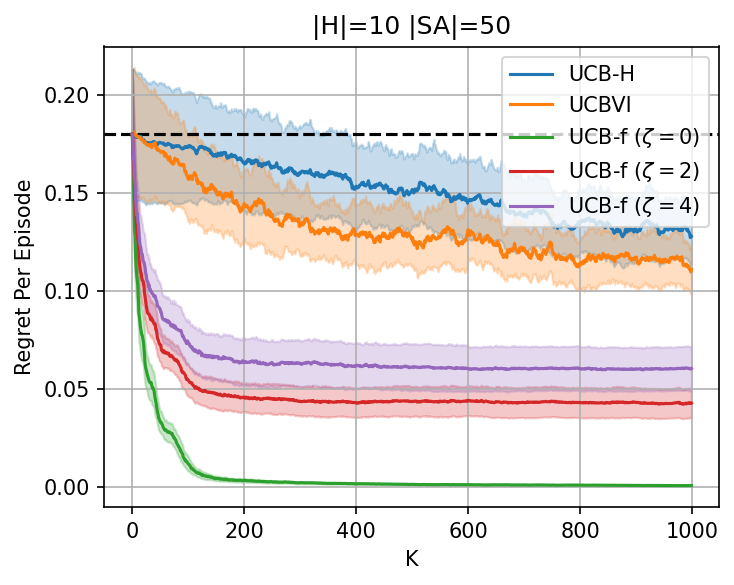

In [5]:
time_array = np.arange(K)

plt.figure(dpi=150, figsize=(5,4))

plt.axhline(np.mean(regret_greedy), c="black", ls="--")

plt.plot(regret_UCB_H.mean(axis=0), label="UCB-H")
plt.fill_between(time_array, regret_UCB_H.mean(axis=0) - 0.5*regret_UCB_H.std(axis=0), 
                       regret_UCB_H.mean(axis=0) + 0.5*regret_UCB_H.std(axis=0), color="C0", alpha=.25)

plt.plot(regret_UCBVI.mean(axis=0), label="UCBVI")
plt.fill_between(time_array, regret_UCBVI.mean(axis=0) - 0.5*regret_UCBVI.std(axis=0), 
                       regret_UCBVI.mean(axis=0) + 0.5*regret_UCBVI.std(axis=0), color="C1", alpha=.25)

plt.plot(regret_UCB_f_0.mean(axis=0), label="UCB-f ($\zeta=0$)")
plt.fill_between(time_array, regret_UCB_f_0.mean(axis=0) - 0.5*regret_UCB_f_0.std(axis=0), 
                       regret_UCB_f_0.mean(axis=0) + 0.5*regret_UCB_f_0.std(axis=0), color="C2", alpha=.25)

plt.plot(regret_UCB_f_1.mean(axis=0), label="UCB-f ($\zeta=2$)")
plt.fill_between(time_array, regret_UCB_f_1.mean(axis=0) - 0.5*regret_UCB_f_1.std(axis=0), 
                       regret_UCB_f_1.mean(axis=0) + 0.5*regret_UCB_f_1.std(axis=0), color="C3", alpha=.25)

plt.plot(regret_UCB_f_2.mean(axis=0), label="UCB-f ($\zeta=4$)")
plt.fill_between(time_array, regret_UCB_f_2.mean(axis=0) - 0.5*regret_UCB_f_2.std(axis=0), 
                       regret_UCB_f_2.mean(axis=0) + 0.5*regret_UCB_f_2.std(axis=0), color="C4", alpha=.25)

plt.title("|H|={} |SA|={}".format(H, S*A))
plt.legend(loc=1)
plt.xlabel("K")
plt.ylabel("Regret Per Episode")
plt.grid()
plt.tight_layout()
plt.show()